<a href="https://colab.research.google.com/github/Revanth810/AI4CCEE_Fall_2024/blob/main/in_class_activity/lecture4/submissions/Revanth_Lecture4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
https://drive.google.com/file/d/14efb9rOQ-NERZR73pswtvQLRe3D0GwRy/view?usp=sharing

# **Lecture 4**


## Activity 0

1. Open Google Colab and start a new notebook.
2. Download and load the sensor data into a colab environment.
3. Load the data into a pandas DataFrame and display the first few rows to understand its structure.

In [ ]:
# Step 1: Install necessary libraries
!pip install gdown

# Step 2: Import required libraries
import pandas as pd

# Step 3: Use gdown to download the file from Google Drive
url = 'https://drive.google.com/uc?id=14efb9rOQ-NERZR73pswtvQLRe3D0GwRy'
output = 'sensor_data.csv'
!gdown $url -O $output

# Step 4: Load the data into a pandas DataFrame
try:
    df = pd.read_csv(output)
    # Step 5: Display the first few rows of the DataFrame
    print("Data loaded successfully!")
    print(df.head())
except Exception as e:
    print(f"An error occurred: {e}")

Downloading...
From: https://drive.google.com/uc?id=14efb9rOQ-NERZR73pswtvQLRe3D0GwRy
To: /content/sensor_data.csv
100% 11.3M/11.3M [00:00<00:00, 70.7MB/s]
Data loaded successfully!
   day                 Time  WAVE-NE-Count  WAVE-NE-Speed  WAVE-SW-Count  \
0    1  2022-07-10 00:00:00            NaN            NaN            3.0   
1    1  2022-07-10 00:01:00           10.0           62.0            2.0   
2    1  2022-07-10 00:02:00            5.0           63.6            4.0   
3    1  2022-07-10 00:03:00           11.0           58.2            9.0   
4    1  2022-07-10 00:04:00           19.0           60.2           17.0   

   WAVE-SW-Speed  Month  Year  
0           59.5     10  2021  
1           59.0     10  2021  
2           58.4     10  2021  
3           60.0     10  2021  
4           61.2     10  2021  


4. Plot the raw sensor data (speed vs. time).

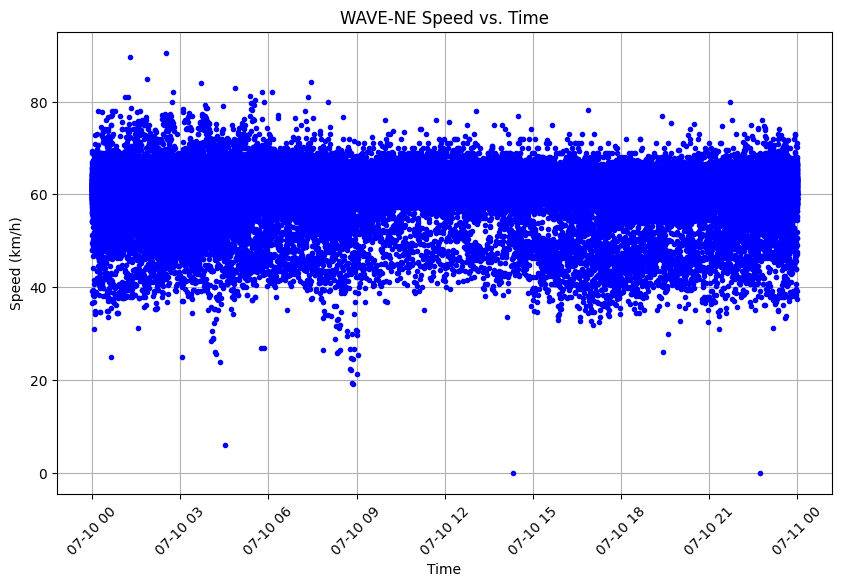

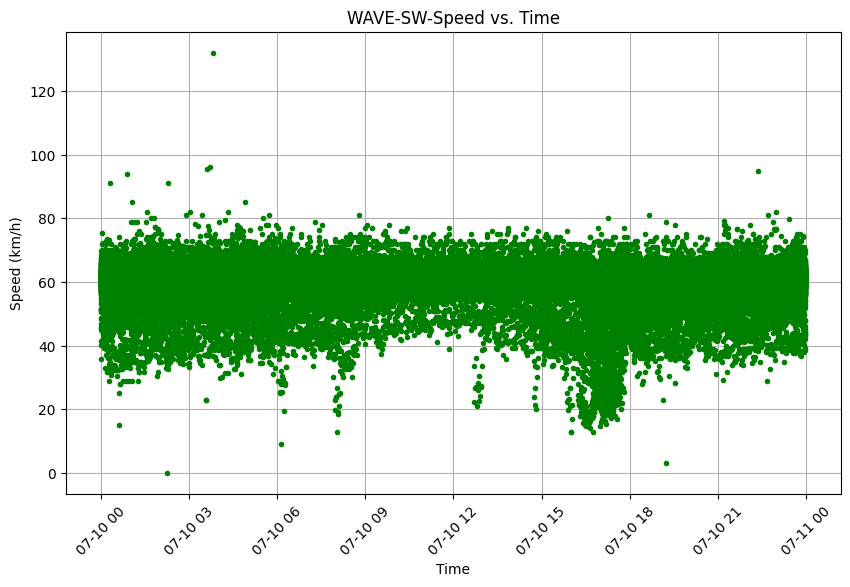

In [ ]:
# Step 2: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 6: Plot WAVE-NE-Speed vs. Time
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['WAVE-NE-Speed'], marker='o', linestyle='None', color='b', markersize=3)

# Step 7: Customize the plot
plt.title('WAVE-NE Speed vs. Time')
plt.xlabel('Time')
plt.ylabel('Speed (km/h)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Step 8: Display the plot
plt.show()


# Step 6: Plot WAVE-NE-Speed vs. Time
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['WAVE-SW-Speed'], marker='o', linestyle='None', color='g', markersize=3)

# Step 7: Customize the plot
plt.title('WAVE-SW-Speed vs. Time')
plt.xlabel('Time')
plt.ylabel('Speed (km/h)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Step 8: Display the plot
plt.show()

What does the plot show? Can you identify any patterns, fluctuations, or anomalies?

Although Median velocities in both NE and SW directions are comparable, SW has larger variation in speed when compared with NE direction.

5. Define a static threshold (e.g., speed < 20 units). Count the number of minutes where the speed drops below this threshold.
6. Highlight or mark those regions on the plot. How many such events do you see?

Number of minutes where WAVE-NE-Speed is below 20 units: 5


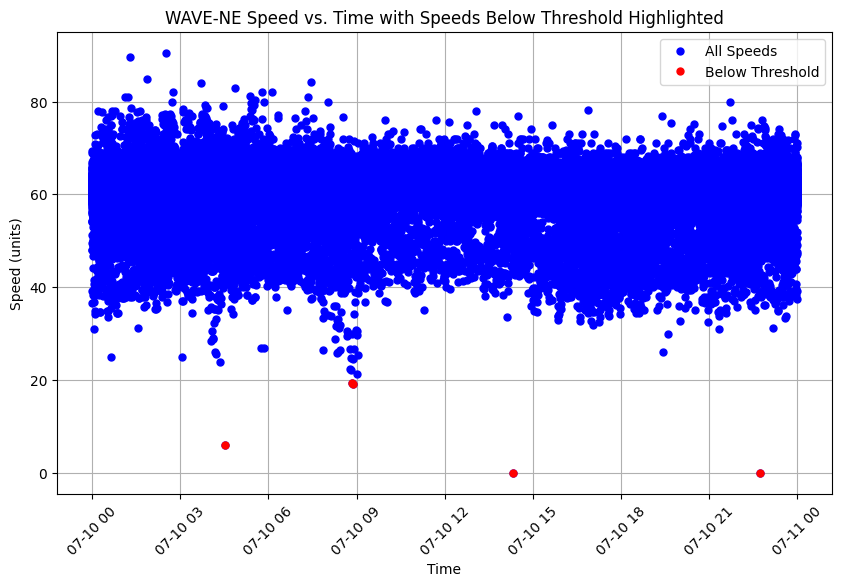

In [ ]:
# Step 6: Define the threshold and count the minutes below it
threshold = 20  # Static threshold for speed
below_threshold = df[df['WAVE-NE-Speed'] < threshold]  # Filter rows where speed < threshold
count_minutes = len(below_threshold)  # Count the number of such rows

# Step 7: Display the result
print(f"Number of minutes where WAVE-NE-Speed is below {threshold} units: {count_minutes}")

# Optional: Plot the points where speed drops below the threshold
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['WAVE-NE-Speed'], marker='o', linestyle='None', color='b', markersize=5, label='All Speeds')
plt.plot(below_threshold['Time'], below_threshold['WAVE-NE-Speed'], marker='o', linestyle='None',
         color='red', markersize=5, label='Below Threshold')

# Customize the plot
plt.title('WAVE-NE Speed vs. Time with Speeds Below Threshold Highlighted')
plt.xlabel('Time')
plt.ylabel('Speed (units)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Display the plot
plt.show()

Number of minutes where WAVE-SW-Speed is below 20 units: 84


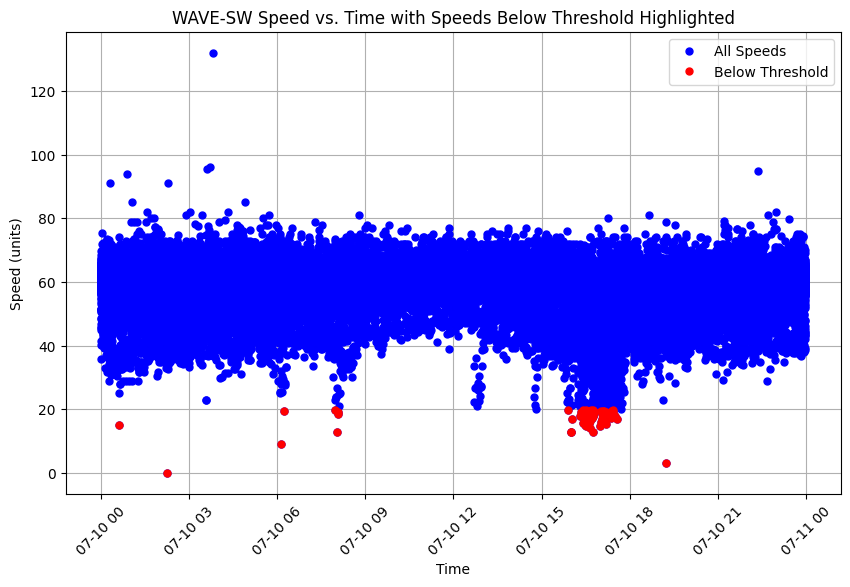

In [ ]:
# Step 6: Define the threshold and count the minutes below it
threshold = 20  # Static threshold for speed
below_threshold = df[df['WAVE-SW-Speed'] < threshold]  # Filter rows where speed < threshold
count_minutes = len(below_threshold)  # Count the number of such rows

# Step 7: Display the result
print(f"Number of minutes where WAVE-SW-Speed is below {threshold} units: {count_minutes}")

# Optional: Plot the points where speed drops below the threshold
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['WAVE-SW-Speed'], marker='o', linestyle='None', color='b', markersize=5, label='All Speeds')
plt.plot(below_threshold['Time'], below_threshold['WAVE-SW-Speed'], marker='o', linestyle='None',
         color='red', markersize=5, label='Below Threshold')

# Customize the plot
plt.title('WAVE-SW Speed vs. Time with Speeds Below Threshold Highlighted')
plt.xlabel('Time')
plt.ylabel('Speed (units)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Display the plot
plt.show()

What methods can we use to reduce the noise in the data? How can we make the events more distinguishable?
1. Smoothing Techniques
  
  a) Moving Average (Rolling Mean)
    
      •	Computes the average over a fixed window of time.
    
      •	Smooths out short-term fluctuations.

  b) Exponential Moving Average (EMA)

      •	Assigns more weight to recent data points, making it more responsive to changes.

2. Filtering Techniques
  
  a) Low-Pass Filter

      •	Removes high-frequency noise, allowing only slow-changing trends to pass through.

3. Outlier Detection and Removal

    •	Detect extreme values using statistical methods (like Z-score or IQR) and remove or correct them.

4. Segmentation and Event Detection Algorithms

    •	Segment the time-series data to detect events based on patterns or thresholds (e.g., speed drops).

5. Signal Denoising with Wavelet Transform

    •	Wavelet transforms can help extract signal components at different scales, reducing noise while preserving events.

6. Feature Engineering for Event Detection
    
    •	Derive new features such as speed variance, acceleration, or moving standard deviation to better capture events.

7. Clustering-Based Event Detection

    •	Use clustering algorithms (like K-Means) to group events or trends in the data.

## Activity 1

1. Implement a 5-minute rolling average to smooth the sensor data of activity 0.

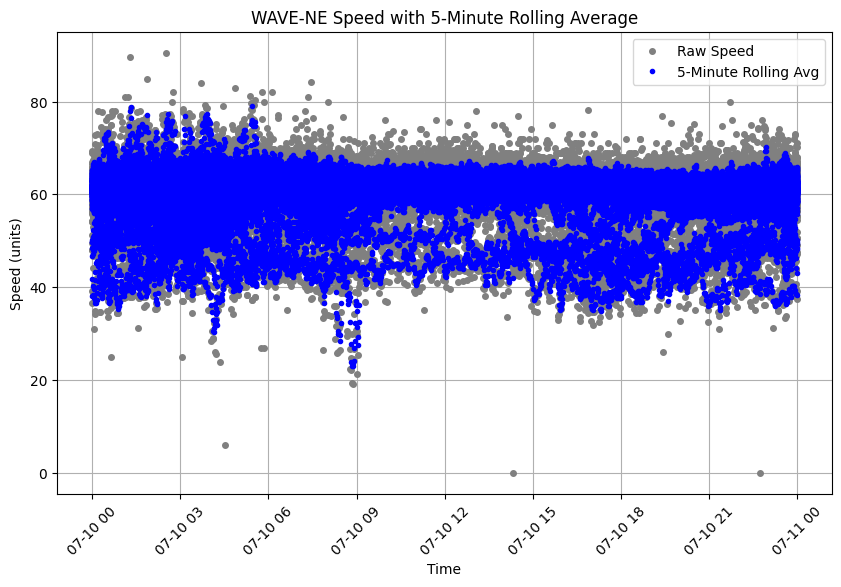

In [ ]:
# Step 6: Compute the 5-minute rolling average for WAVE-NE-Speed
df['WAVE-NE-Speed-5MinAvg'] = df['WAVE-NE-Speed'].rolling(window=5, min_periods=1).mean()

# Step 7: Plot the raw data and the 5-minute rolling average
plt.figure(figsize=(10, 6))

# Plot raw speed data
plt.plot(df['Time'], df['WAVE-NE-Speed'], marker='o', linestyle='None', color='grey', markersize=4, label='Raw Speed')

# Plot 5-minute rolling average
plt.plot(df['Time'], df['WAVE-NE-Speed-5MinAvg'], color='blue', label='5-Minute Rolling Avg', marker='o',markersize=3,linestyle='None')

# Customize the plot
plt.title('WAVE-NE Speed with 5-Minute Rolling Average')
plt.xlabel('Time')
plt.ylabel('Speed (units)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Display the plot
plt.show()

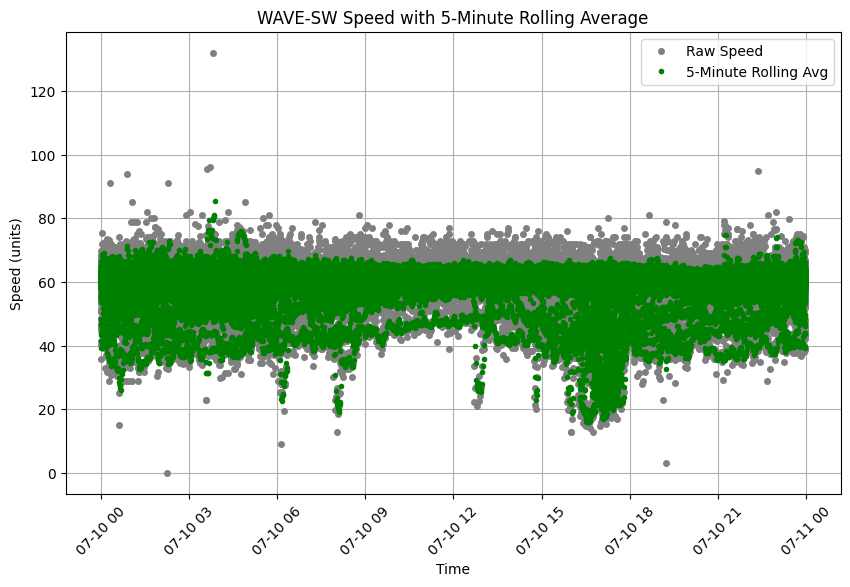

In [ ]:
# Step 6: Compute the 5-minute rolling average for WAVE-NE-Speed
df['WAVE-SW-Speed-5MinAvg'] = df['WAVE-SW-Speed'].rolling(window=5, min_periods=1).mean()

# Step 7: Plot the raw data and the 5-minute rolling average
plt.figure(figsize=(10, 6))

# Plot raw speed data
plt.plot(df['Time'], df['WAVE-SW-Speed'], marker='o', linestyle='None', color='grey', markersize=4, label='Raw Speed')

# Plot 5-minute rolling average
plt.plot(df['Time'], df['WAVE-SW-Speed-5MinAvg'], color='green', label='5-Minute Rolling Avg', marker='o',markersize=3,linestyle='None')

# Customize the plot
plt.title('WAVE-SW Speed with 5-Minute Rolling Average')
plt.xlabel('Time')
plt.ylabel('Speed (units)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Display the plot
plt.show()

Compare the original data and the smoothed data. Discuss the impact of smoothing, such as reduced noise versus potential loss of detail?

This method has removed the outliers and smoothened the data. This might cause the potential loss of understanding on the extreme conditions which might be crucial.

## Activity 2

1. Check for missing data.
2. If missing values are present in the speed column, fill them using interpolation.


In [ ]:
# Step 1: Check for missing data in the speed columns (WAVE-NE-Speed, WAVE-SW-Speed)
missing_ne_speed = df['WAVE-NE-Speed'].isnull().sum()
missing_sw_speed = df['WAVE-SW-Speed'].isnull().sum()

# Step 2: Fill missing values using interpolation
df['WAVE-NE-Speed'] = df['WAVE-NE-Speed'].interpolate(method='linear')
df['WAVE-SW-Speed'] = df['WAVE-SW-Speed'].interpolate(method='linear')

3. Remove any speed values that fall outside a reasonable range.
4. Plot the Cleaned Data.


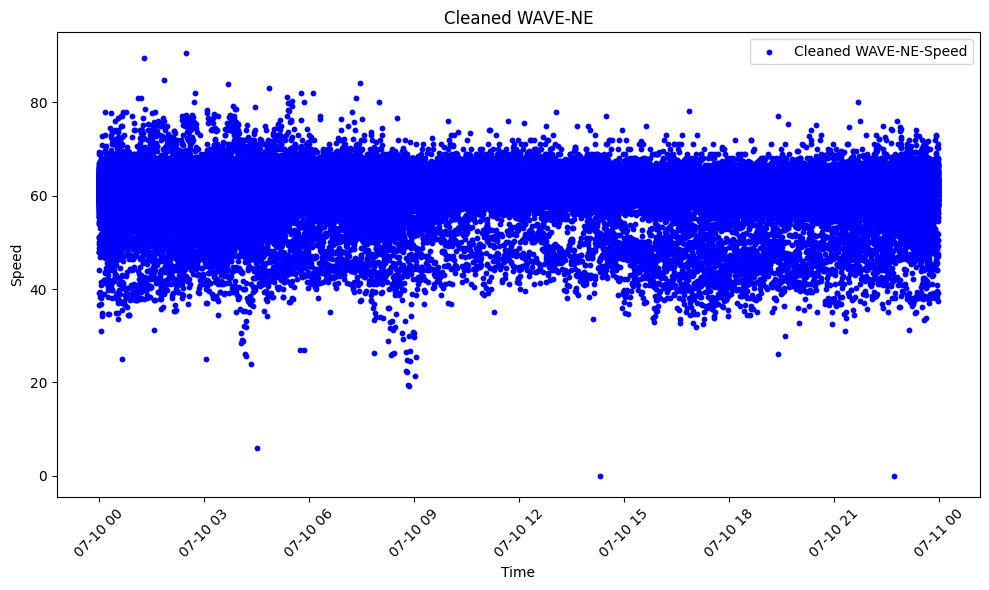

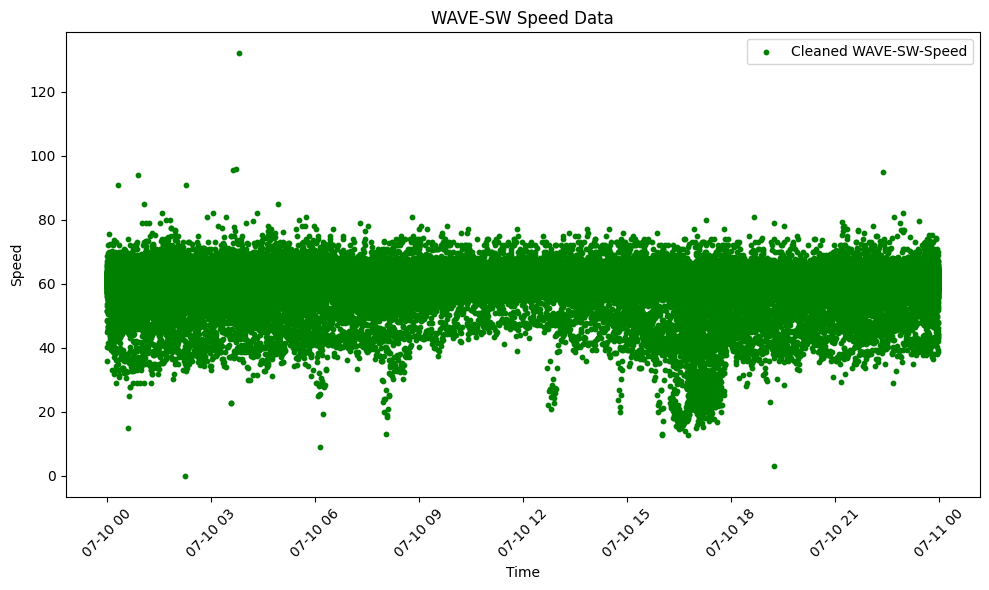

In [ ]:
# Step 3: Check for and remove duplicate rows
df_cleaned = df.drop_duplicates()

# Step 4: Remove any speed values that fall outside a reasonable range (e.g., negative or above 150)
reasonable_range_NE = (df_cleaned['WAVE-NE-Speed'] >= 0) & (df_cleaned['WAVE-NE-Speed'] <= 150)
df_cleaned = df_cleaned[reasonable_range_NE]


# Step 5: Plot the cleaned data
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Time'], df_cleaned['WAVE-NE-Speed'], label='Cleaned WAVE-NE-Speed', color='blue', s=10)
# plt.scatter(df_cleaned['Time'], df_cleaned['WAVE-SW-Speed'], label='Cleaned WAVE-SW-Speed', color='green', s=10)
plt.xlabel('Time')
plt.ylabel('Speed')
plt.title('Cleaned WAVE-NE')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




reasonable_range_SW = (df_cleaned['WAVE-SW-Speed'] >= 0) & (df_cleaned['WAVE-SW-Speed'] <= 150)
df_cleaned = df_cleaned[reasonable_range_SW]


# Step 5: Plot the cleaned data
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Time'], df_cleaned['WAVE-SW-Speed'], label='Cleaned WAVE-SW-Speed', color='green', s=10)
plt.xlabel('Time')
plt.ylabel('Speed')
plt.title('WAVE-SW Speed Data')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

6. Apply the Fast Fourier Transform (FFT) to the  cleaned sensor data.

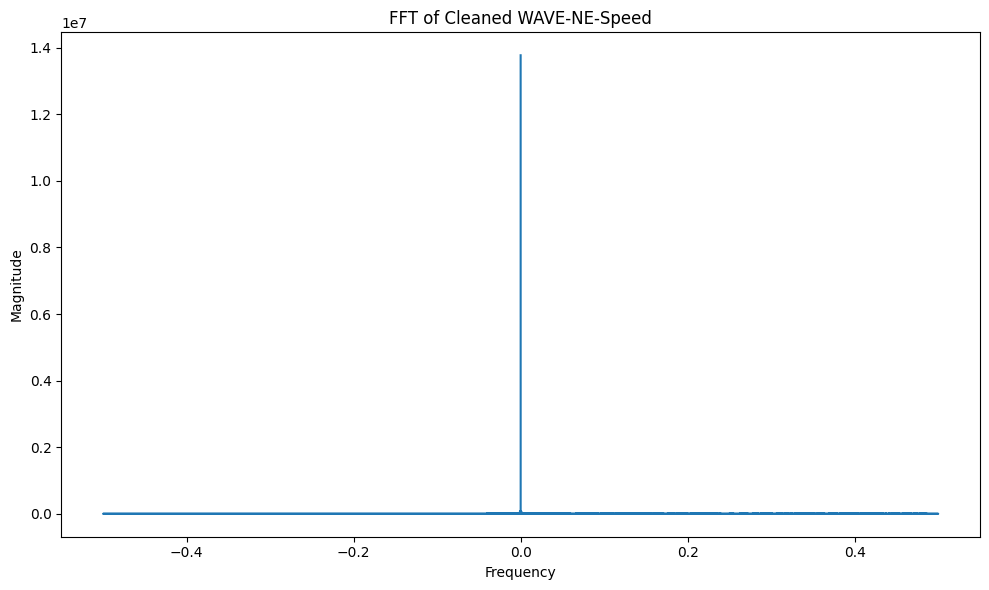

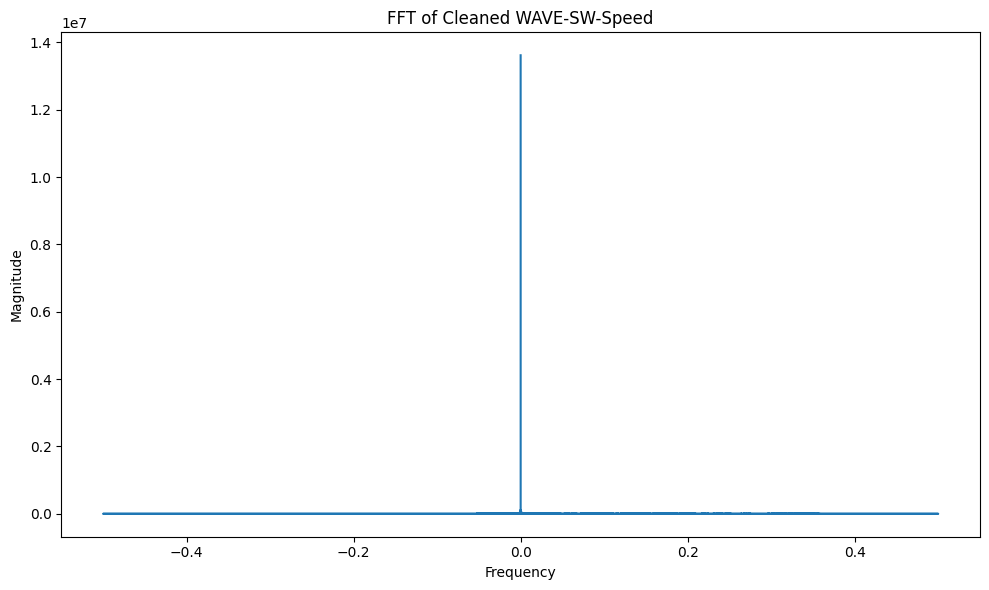

In [ ]:
# Step 6: Apply Fast Fourier Transform (FFT) to the cleaned WAVE-NE-Speed data
import numpy as np

# Perform FFT on the cleaned WAVE-NE-Speed
fft_ne_speed = np.fft.fft(df_cleaned['WAVE-NE-Speed'].values)
fft_freqs = np.fft.fftfreq(len(fft_ne_speed), d=1)

# Plot the FFT result (magnitude of FFT)
plt.figure(figsize=(10, 6))
plt.plot(fft_freqs, np.abs(fft_ne_speed))
plt.title('FFT of Cleaned WAVE-NE-Speed')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.tight_layout()
plt.show()



# Perform FFT on the cleaned WAVE-SW-Speed
fft_sw_speed = np.fft.fft(df_cleaned['WAVE-SW-Speed'].values)
fft_freqs = np.fft.fftfreq(len(fft_sw_speed), d=1)

# Plot the FFT result (magnitude of FFT)
plt.figure(figsize=(10, 6))
plt.plot(fft_freqs, np.abs(fft_sw_speed))
plt.title('FFT of Cleaned WAVE-SW-Speed')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.tight_layout()
plt.show()

In [ ]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 28.4 MB/s eta 0:00:00


## Activity 3

1. Apply a continuous wavelet transform (CWT) to the sensor data to visualize how the frequency content changes over time. Use wavelet = 'mexh'
2. Plot a scalogram (heatmap) of the wavelet coefficients.

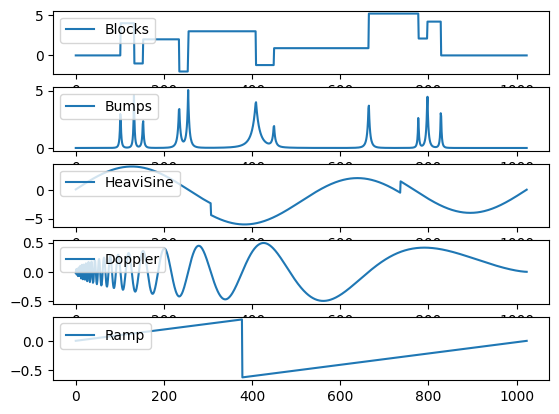

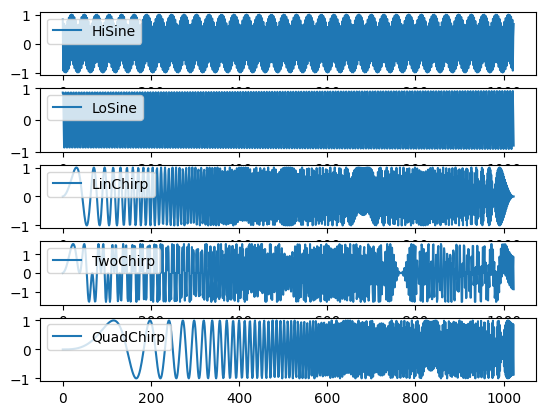

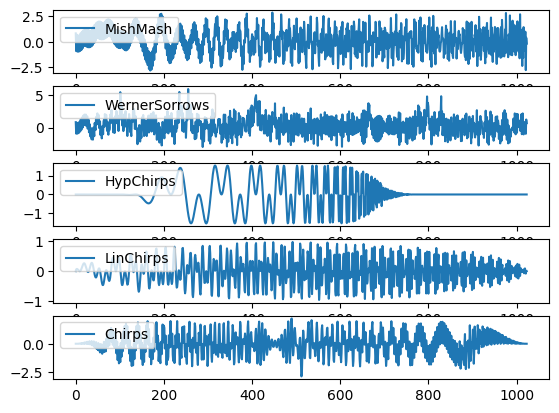

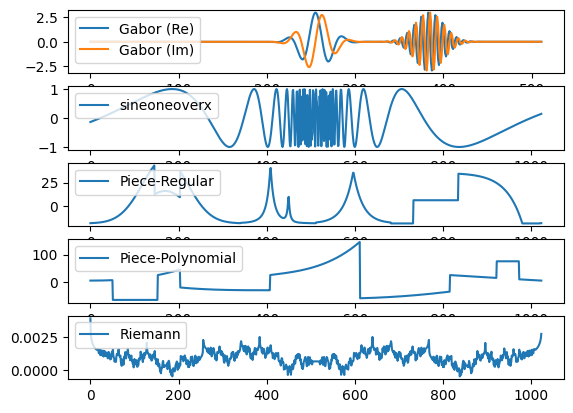

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import pywt

# use 'list' to get a list of all available 1d demo signals
signals = pywt.data.demo_signal('list')

subplots_per_fig = 5
signal_length = 1024
i_fig = 0
n_figures = int(np.ceil(len(signals)/subplots_per_fig))
for i_fig in range(n_figures):
    # Select a subset of functions for the current plot
    func_subset = signals[
        i_fig * subplots_per_fig:(i_fig + 1) * subplots_per_fig]

    # create a figure to hold this subset of the functions
    fig, axes = plt.subplots(subplots_per_fig, 1)
    axes = axes.ravel()
    for n, signal in enumerate(func_subset):
        if signal in ['Gabor', 'sineoneoverx']:
            # user cannot specify a length for these two
            x = pywt.data.demo_signal(signal)
        else:
            x = pywt.data.demo_signal(signal, signal_length)
        ax = axes[n]
        ax.plot(x.real)
        if signal == 'Gabor':
            # The Gabor signal is complex-valued
            ax.plot(x.imag)
            ax.legend(['Gabor (Re)', 'Gabor (Im)'], loc='upper left')
        else:
            ax.legend([signal, ], loc='upper left')
    # omit axes for any unused subplots
    for n in range(n + 1, len(axes)):
        axes[n].set_axis_off()
plt.show()

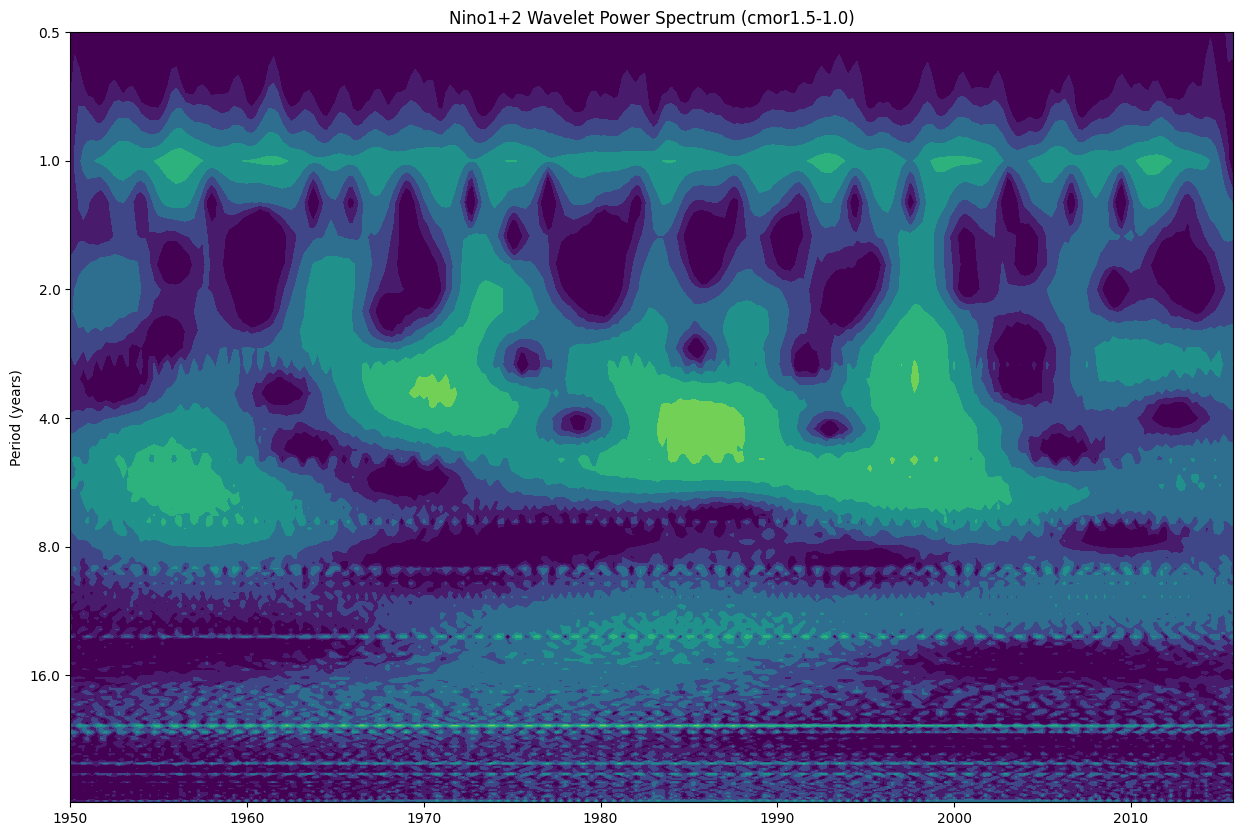

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import pywt

time, sst = pywt.data.nino()
dt = time[1] - time[0]

# Taken from http://nicolasfauchereau.github.io/climatecode/posts/wavelet-analysis-in-python/
wavelet = 'cmor1.5-1.0'
scales = np.arange(1, 128)

[cfs, frequencies] = pywt.cwt(sst, scales, wavelet, dt)
power = (abs(cfs)) ** 2

period = 1. / frequencies
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
f, ax = plt.subplots(figsize=(15, 10))
ax.contourf(time, np.log2(period), np.log2(power), np.log2(levels),
            extend='both')

ax.set_title(f'Nino1+2 Wavelet Power Spectrum ({wavelet})')
ax.set_ylabel('Period (years)')
Yticks = 2 ** np.arange(np.ceil(np.log2(period.min())),
                        np.ceil(np.log2(period.max())))
ax.set_yticks(np.log2(Yticks))
ax.set_yticklabels(Yticks)
ax.invert_yaxis()
ylim = ax.get_ylim()
ax.set_ylim(ylim[0], -1)

plt.show()


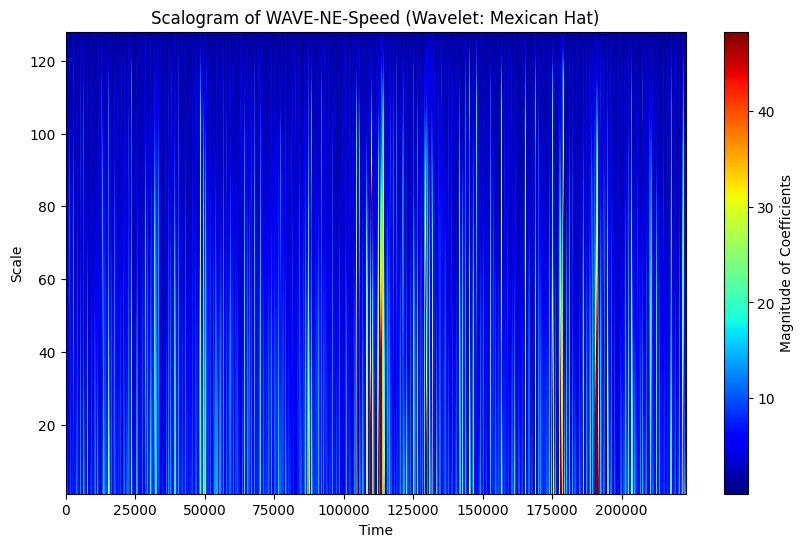

In [ ]:
# Extract the WAVE-NE-Speed column for the analysis
signal = df_cleaned['WAVE-NE-Speed'].values

# Define scales (these control the resolution of the wavelet transform)
scales = np.arange(1, 128)

# Apply the CWT with the 'mexh' wavelet
coefficients, frequencies = pywt.cwt(signal, scales, 'mexh')


plt.figure(figsize=(10, 6))

# Create a heatmap of the wavelet coefficients
plt.imshow(np.abs(coefficients), extent=[0, len(signal), 1, 128], cmap='jet', aspect='auto',
           vmax=np.percentile(np.abs(coefficients), 99))  # Adjust the color scale for visibility

plt.colorbar(label='Magnitude of Coefficients')
plt.title('Scalogram of WAVE-NE-Speed (Wavelet: Mexican Hat)')
plt.xlabel('Time')
plt.ylabel('Scale')
plt.show()

## Activity 4


Install requests, pillow, and pywt in your colab environment.2. Download image from :https://github.Com/barkham21/ai4ccee_fall_2024/blob/main/in_class_activity/lecture4/2018-06-30-19-05.Jpg3.
Load image in your google colab environment.
Display the image4.
Convert image to np array.

In [ ]:
!pip install requests Pillow PyWavelets

In [ ]:
import requests

# URL of the image
url = 'https://github.com/barkham21/ai4ccee_fall_2024/blob/main/in_class_activity/lecture4/2018-06-30-19-05.jpg?raw=true'

# Send a GET request to the URL and save the image
response = requests.get(url)
with open('image.jpg', 'wb') as file:
    file.write(response.content)


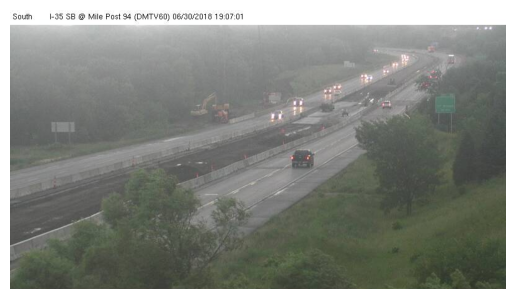

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
img = Image.open('image.jpg')

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:

import numpy as np

# Convert the image to grayscale (optional, you can also work with color)
img_gray = img.convert('L')

# Convert to NumPy array
img_array = np.array(img_gray)


5. Perform wavelet transform: use dwt2 to decompose the image and use haar wavelet.

In [ ]:
import pywt

# Perform 2D Discrete Wavelet Transform using the 'haar' wavelet
coeffs2 = pywt.dwt2(img_array, 'haar')

# Unpack the coefficients (LL: Approximation, LH: Horizontal, HL: Vertical, HH: Diagonal)
LL, (LH, HL, HH) = coeffs2


Plot approximation coefficients (LL) , horizontal detail coefficients(LH), vertical detail coefficients (HL) , diagonal detail coefficients (HH) results.

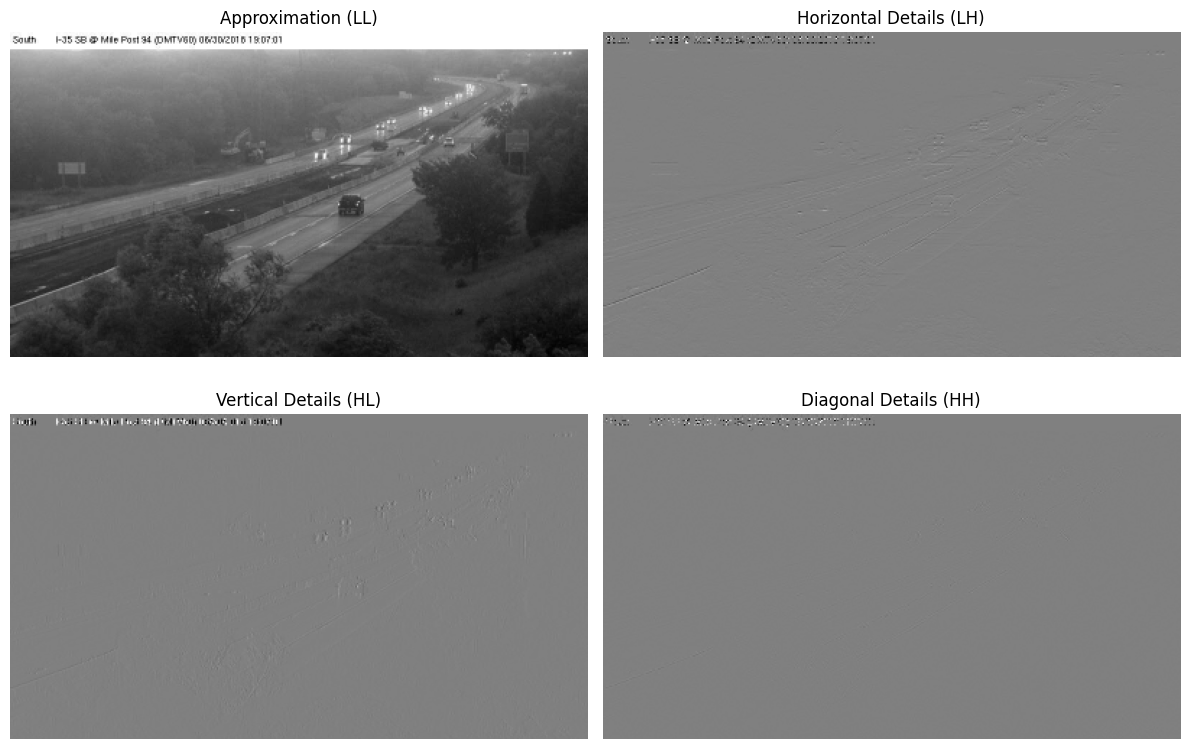

In [ ]:

plt.figure(figsize=(12, 8))

# Plot the approximation coefficients (LL)
plt.subplot(2, 2, 1)
plt.imshow(LL, cmap='gray')
plt.title('Approximation (LL)')
plt.axis('off')

# Plot the horizontal detail coefficients (LH)
plt.subplot(2, 2, 2)
plt.imshow(LH, cmap='gray')
plt.title('Horizontal Details (LH)')
plt.axis('off')

# Plot the vertical detail coefficients (HL)
plt.subplot(2, 2, 3)
plt.imshow(HL, cmap='gray')
plt.title('Vertical Details (HL)')
plt.axis('off')

# Plot the diagonal detail coefficients (HH)
plt.subplot(2, 2, 4)
plt.imshow(HH, cmap='gray')
plt.title('Diagonal Details (HH)')
plt.axis('off')

plt.tight_layout()
plt.show()